<a href="https://colab.research.google.com/github/taniagiovani/myprojects-classmdl/blob/main/Classification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import io
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
df_train = pd.read_csv('/content/gdrive/MyDrive/Collab Dataset/Challenge 2/train.csv')
df_test = pd.read_csv('/content/gdrive/MyDrive/Collab Dataset/Challenge 2/test.csv')

In [ ]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [ ]:
df_train.shape, df_test.shape

((4250, 20), (750, 20))

In [ ]:
df_train = df_train.drop(['account_length'], axis = 1)
df_test = df_test.drop(['id'], axis = 1)
df_test = df_test.drop(['account_length'], axis = 1)

In [ ]:
num_col = df_train.select_dtypes(include = [np.number]).columns.tolist()
cat_col = df_train.select_dtypes(exclude = [np.number]).columns.tolist()

In [ ]:
num_col

['number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

In [ ]:
cat_col

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

#EDA

##Visualize Data

In [ ]:
# set visualization settings

%matplotlib inline
plt.rcParams['figure.figsize'] = (15,25)
plt.rcParams['font.size'] = 6
plt.rcParams['axes.titlesize'] = 6
plt.rcParams['axes.labelsize'] = 6
plt.style.use('fivethirtyeight')
sns.set_palette('Set2')

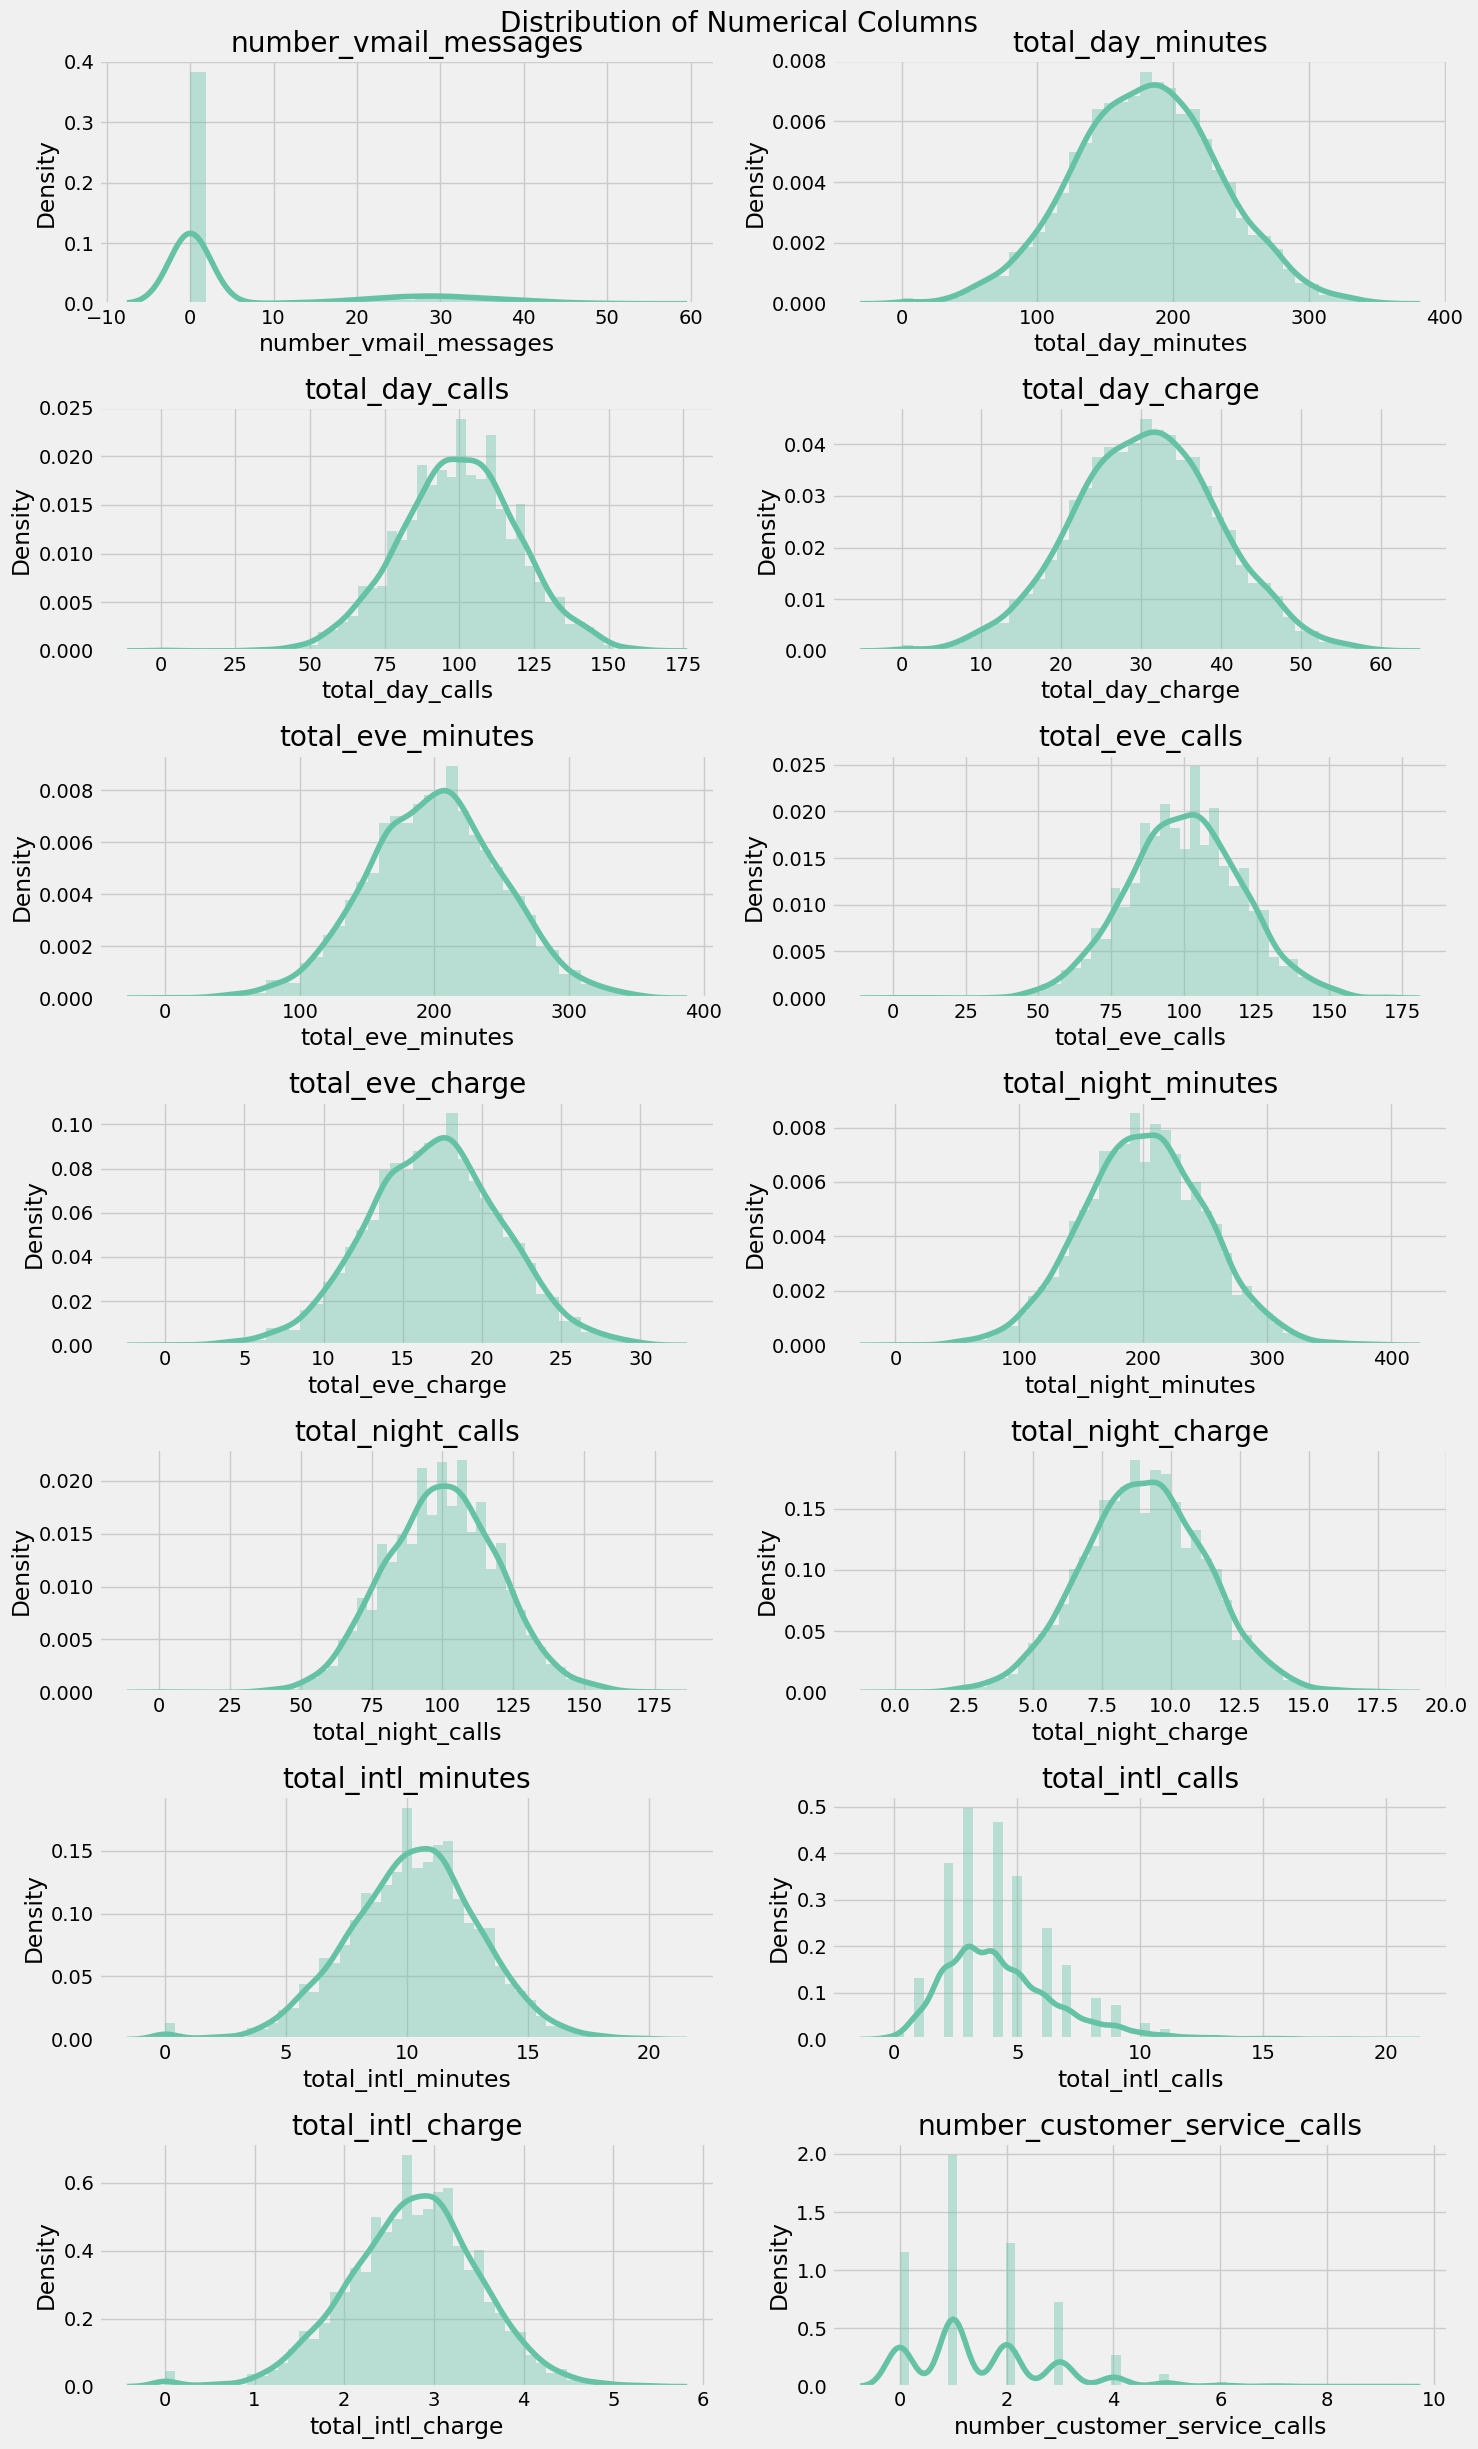

In [ ]:
# visualize numerical data

for index, col in enumerate(num_col):
  plt.subplot(7,2, index+1)
  sns.distplot(df_train[col])
  plt.title(col)
  plt.tight_layout()
  plt.suptitle('Distribution of Numerical Columns', fontsize = 20)

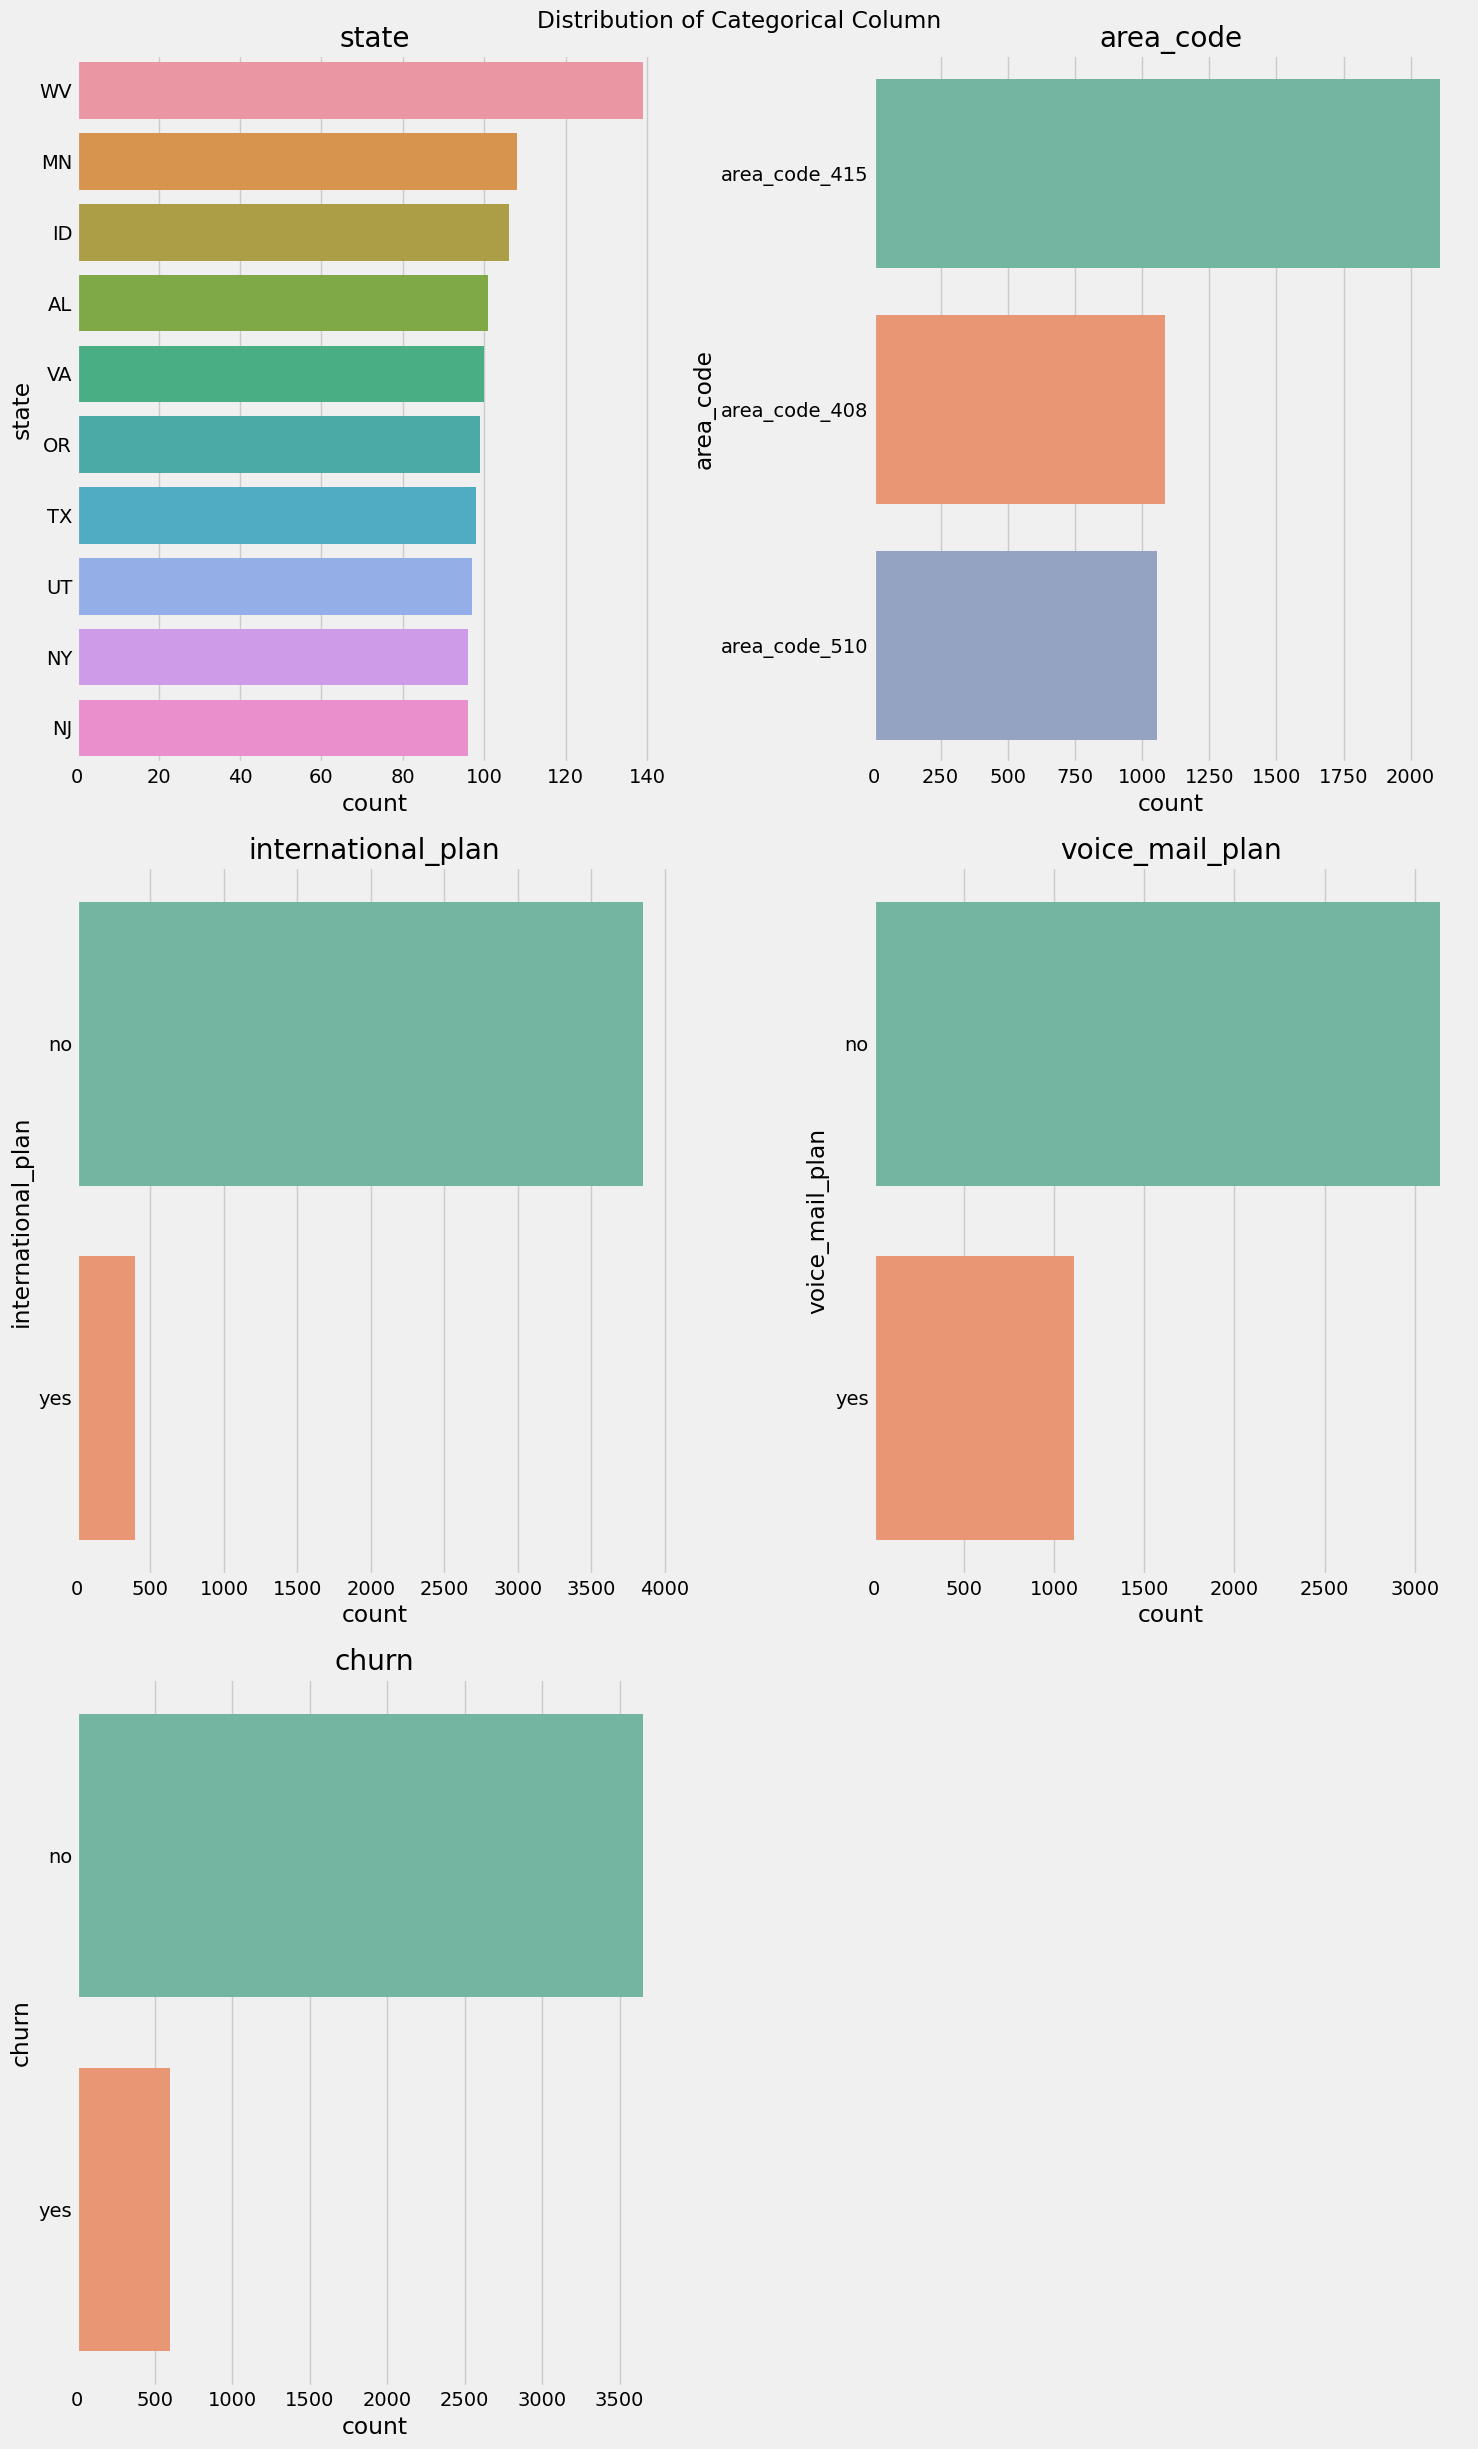

In [ ]:
# for non numerical data, make countplot
# a.iloc[:, 2:5] => call all rows from columns with index 2 (3rd column) to index 4 (5th column)
for index, col in enumerate(cat_col):
  if len(df_train[col]) > 0:
    top = 10
  else:
    top = None
  plt.subplot(3,2, index+1)
  sns.countplot(y = df_train[col], order = df_train[col].value_counts().iloc[:top].index)
  plt.title(col)
  plt.tight_layout()
  plt.suptitle('Distribution of Categorical Column')

<Axes: xlabel='count', ylabel='churn'>

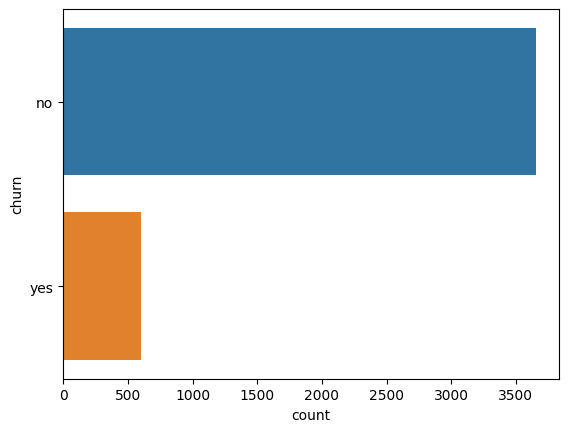

In [ ]:
import seaborn as sns
sns.countplot(y = df_train['churn'], order = df_train['churn'].value_counts().iloc[:10].index)

##Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
lab = LabelEncoder()
df_train['state'] = lab.fit_transform(df_train['state'])
df_train['area_code'] = lab.fit_transform(df_train['area_code'])
df_train['international_plan'] = lab.fit_transform(df_train['international_plan'])
df_train['voice_mail_plan'] = lab.fit_transform(df_train['voice_mail_plan'])
df_train['churn'] = lab.fit_transform(df_train['churn'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   int64  
 1   area_code                      4250 non-null   int64  
 2   international_plan             4250 non-null   int64  
 3   voice_mail_plan                4250 non-null   int64  
 4   number_vmail_messages          4250 non-null   int64  
 5   total_day_minutes              4250 non-null   float64
 6   total_day_calls                4250 non-null   int64  
 7   total_day_charge               4250 non-null   float64
 8   total_eve_minutes              4250 non-null   float64
 9   total_eve_calls                4250 non-null   int64  
 10  total_eve_charge               4250 non-null   float64
 11  total_night_minutes            4250 non-null   float64
 12  total_night_calls              4250 non-null   i

In [ ]:
lab = LabelEncoder()
df_test['state'] = lab.fit_transform(df_test['state'])
df_test['area_code'] = lab.fit_transform(df_test['area_code'])
df_test['international_plan'] = lab.fit_transform(df_test['international_plan'])
df_test['voice_mail_plan'] = lab.fit_transform(df_test['voice_mail_plan'])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          750 non-null    int64  
 1   area_code                      750 non-null    int64  
 2   international_plan             750 non-null    int64  
 3   voice_mail_plan                750 non-null    int64  
 4   number_vmail_messages          750 non-null    int64  
 5   total_day_minutes              750 non-null    float64
 6   total_day_calls                750 non-null    int64  
 7   total_day_charge               750 non-null    float64
 8   total_eve_minutes              750 non-null    float64
 9   total_eve_calls                750 non-null    int64  
 10  total_eve_charge               750 non-null    float64
 11  total_night_minutes            750 non-null    float64
 12  total_night_calls              750 non-null    int

##Statistik Deskriptif

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
state,4250.0,26.094118,14.769049,0.0,14.0000,26.00,39.0000,50.00
area_code,4250.0,0.992941,0.709978,0.0,0.0000,1.00,1.0000,2.00
international_plan,4250.0,0.093176,0.290714,0.0,0.0000,0.00,0.0000,1.00
voice_mail_plan,4250.0,0.261647,0.439583,0.0,0.0000,0.00,1.0000,1.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00


In [ ]:
df_train.corr().T

,state,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
state,1.000000,0.020713,0.003822,-0.034752,-0.030857,0.014263,-0.009890,0.014262,0.001603,-0.009116,0.001603,0.004827,-0.006597,0.004815,-0.010260,0.007469,-0.010284,-0.020421,0.007181
area_code,0.020713,1.000000,0.027133,-0.001622,-0.002468,0.006344,-0.009064,0.006342,-0.000244,-0.014031,-0.000229,0.019034,0.022869,0.019031,0.013641,-0.007027,0.013518,0.011064,0.010696
international_plan,0.003822,0.027133,1.000000,0.000714,0.004808,0.040059,0.009776,0.040061,0.023484,-0.003004,0.023479,-0.020694,0.007153,-0.020694,0.023815,0.006956,0.023799,-0.008881,0.259053
voice_mail_plan,-0.034752,-0.001622,0.000714,1.000000,0.954014,-0.000653,-0.010004,-0.000658,0.011982,0.000263,0.011989,0.017884,0.007872,0.017875,0.008098,-0.005674,0.008129,-0.021504,-0.114643
number_vmail_messages,-0.030857,-0.002468,0.004808,0.954014,1.000000,0.002000,-0.006920,0.001994,0.010725,0.003593,0.010736,0.018308,0.001977,0.018300,0.005220,0.006585,0.005249,-0.015303,-0.100347
total_day_minutes,0.014263,0.006344,0.040059,-0.000653,0.002000,1.000000,0.000747,1.000000,-0.013248,0.005986,-0.013258,0.010049,-0.004812,0.010036,-0.021369,0.003859,-0.021291,-0.002925,0.215272
total_day_calls,-0.009890,-0.009064,0.009776,-0.010004,-0.006920,0.000747,1.000000,0.000751,0.008661,0.003739,0.008663,0.002206,-0.004815,0.002200,0.008834,0.009377,0.008909,-0.015845,0.011640
total_day_charge,0.014262,0.006342,0.040061,-0.000658,0.001994,1.000000,0.000751,1.000000,-0.013247,0.005985,-0.013257,0.010053,-0.004816,0.010040,-0.021374,0.003853,-0.021296,-0.002932,0.215263
total_eve_minutes,0.001603,-0.000244,0.023484,0.011982,0.010725,-0.013248,0.008661,-0.013247,1.000000,0.003101,1.000000,-0.014018,0.011973,-0.014031,-0.003509,0.012239,-0.003460,-0.010063,0.078855
total_eve_calls,-0.009116,-0.014031,-0.003004,0.000263,0.003593,0.005986,0.003739,0.005985,0.003101,1.000000,0.003120,0.008425,-0.011929,0.008441,-0.013096,0.004949,-0.013145,0.006956,-0.006817


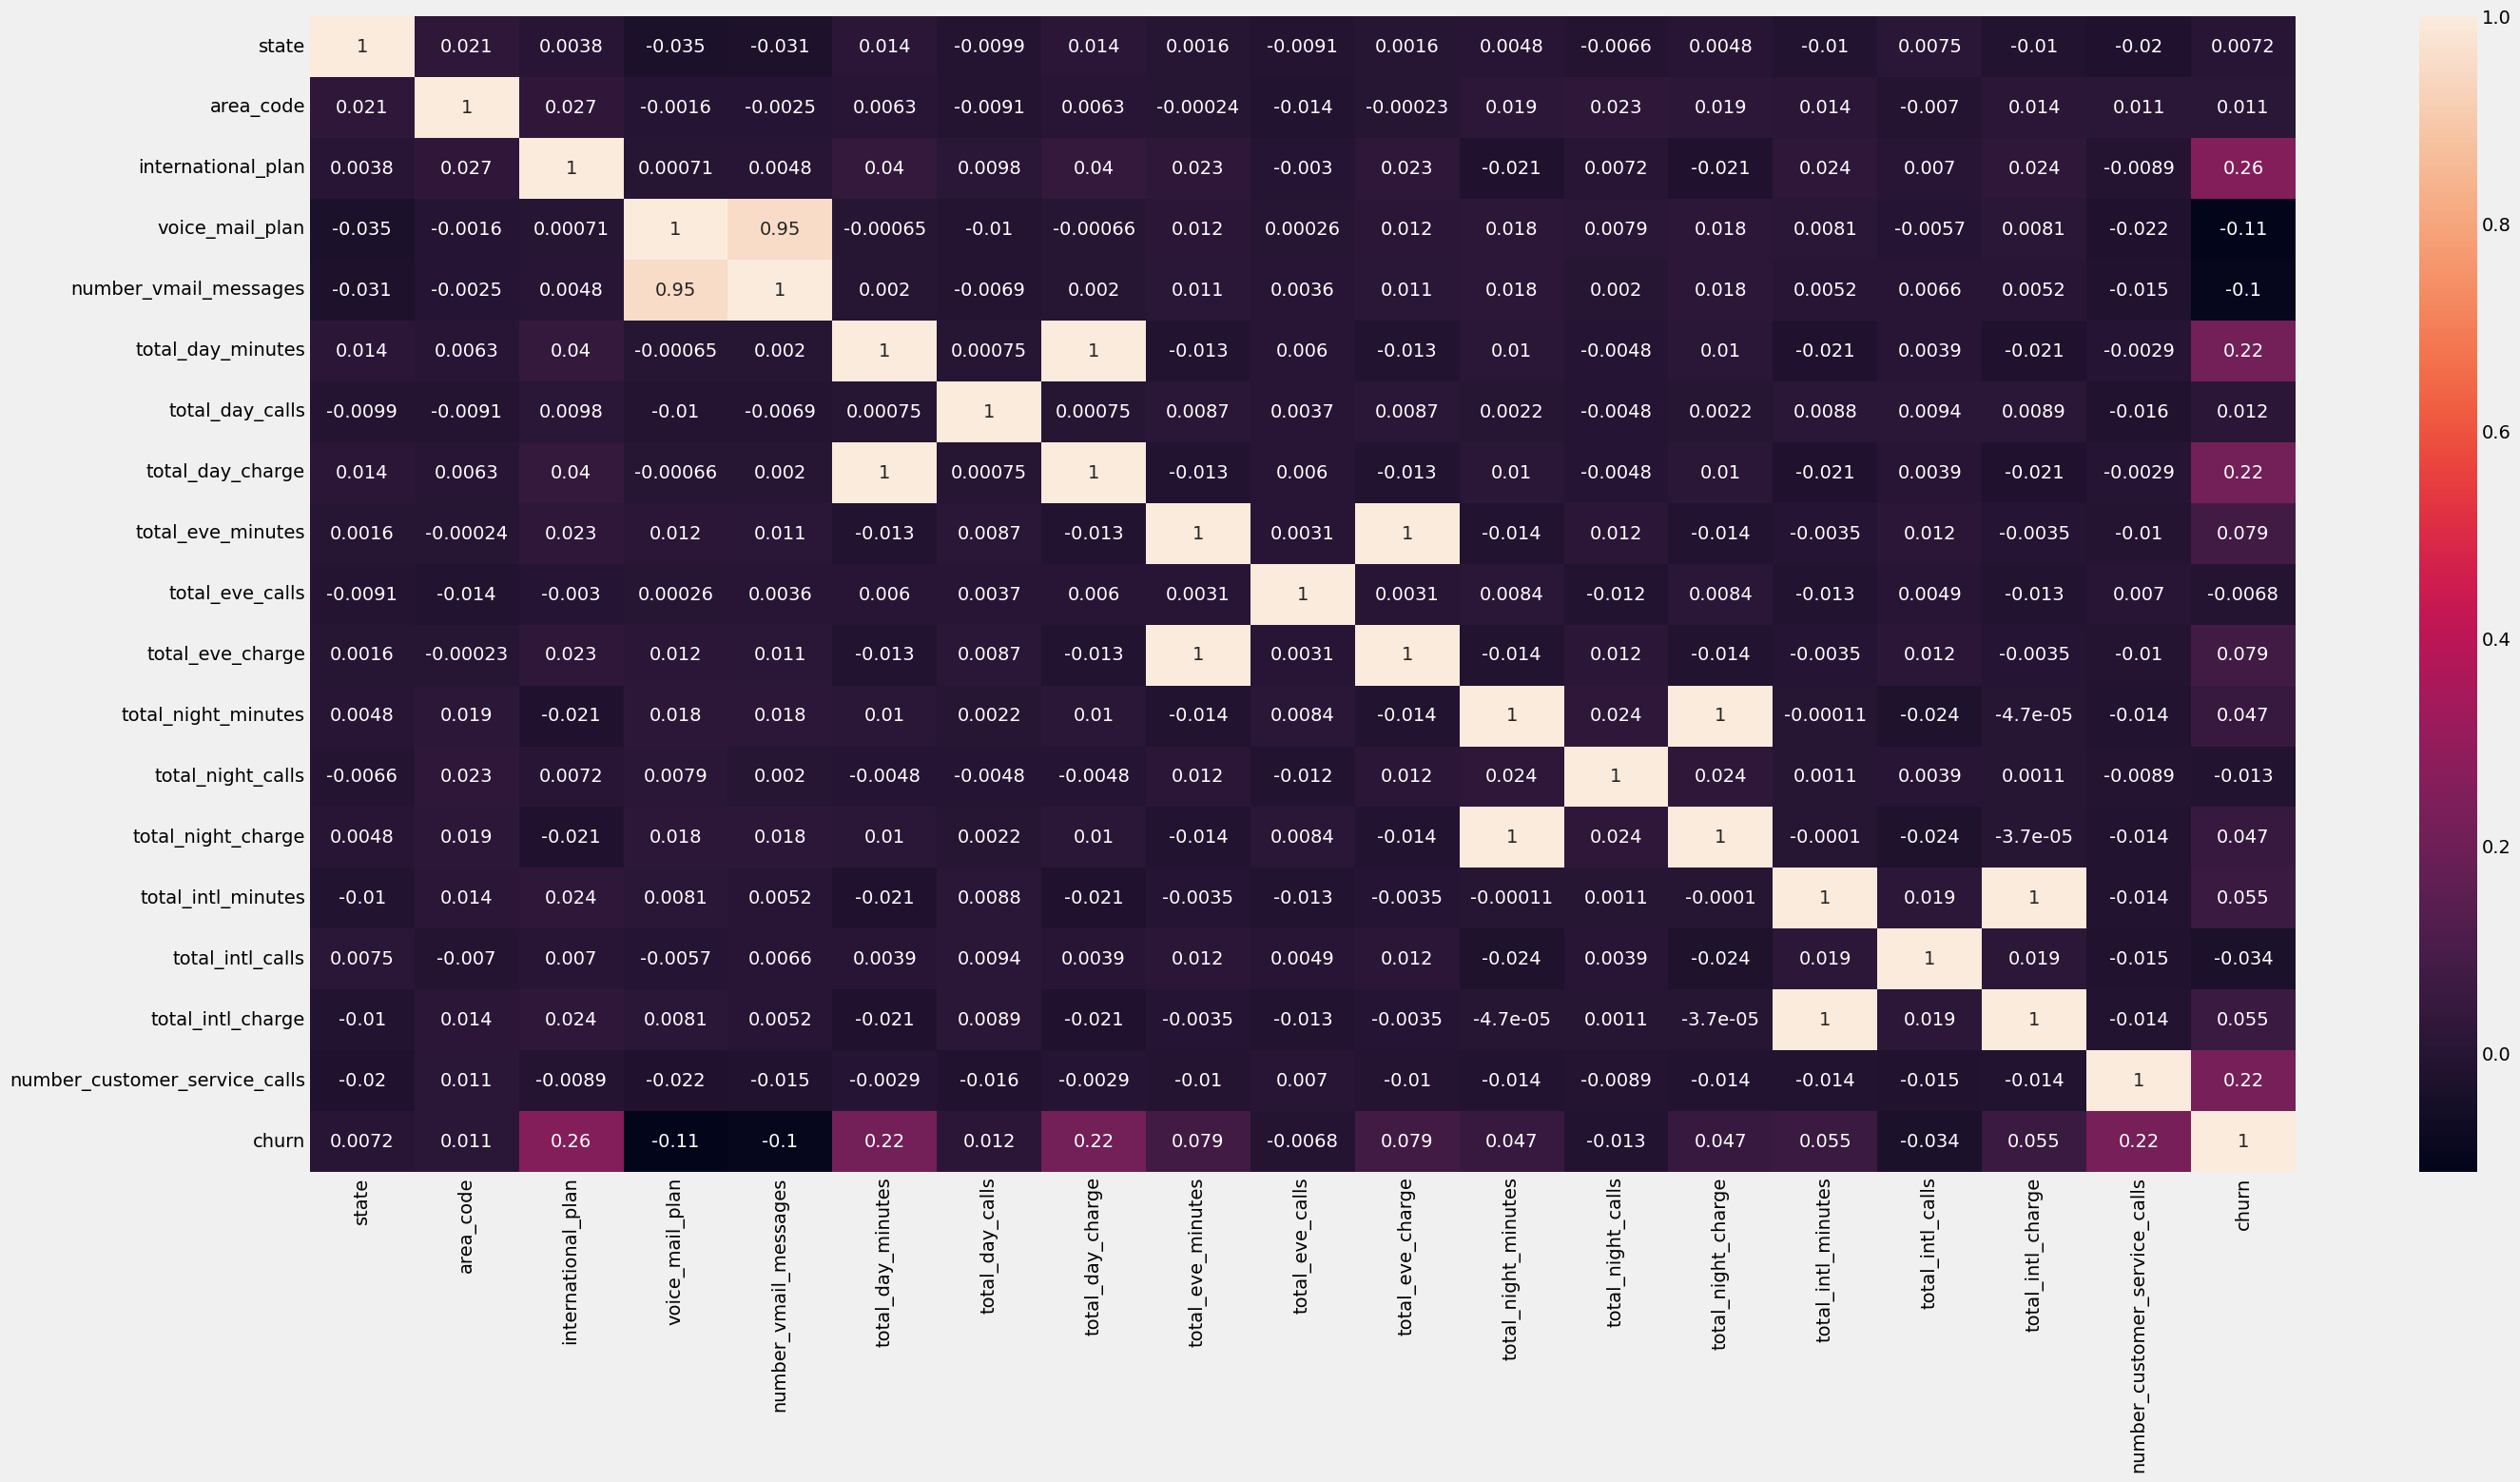

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,15))
#generate a correlation matrix for the whole dataset
corrMatrix = df_train.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

##Feature Engineering

In [ ]:
df_train = df_train.drop(['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes', 'number_vmail_messages'], axis = 1)
df_test = df_test.drop(['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes', 'number_vmail_messages'], axis = 1)

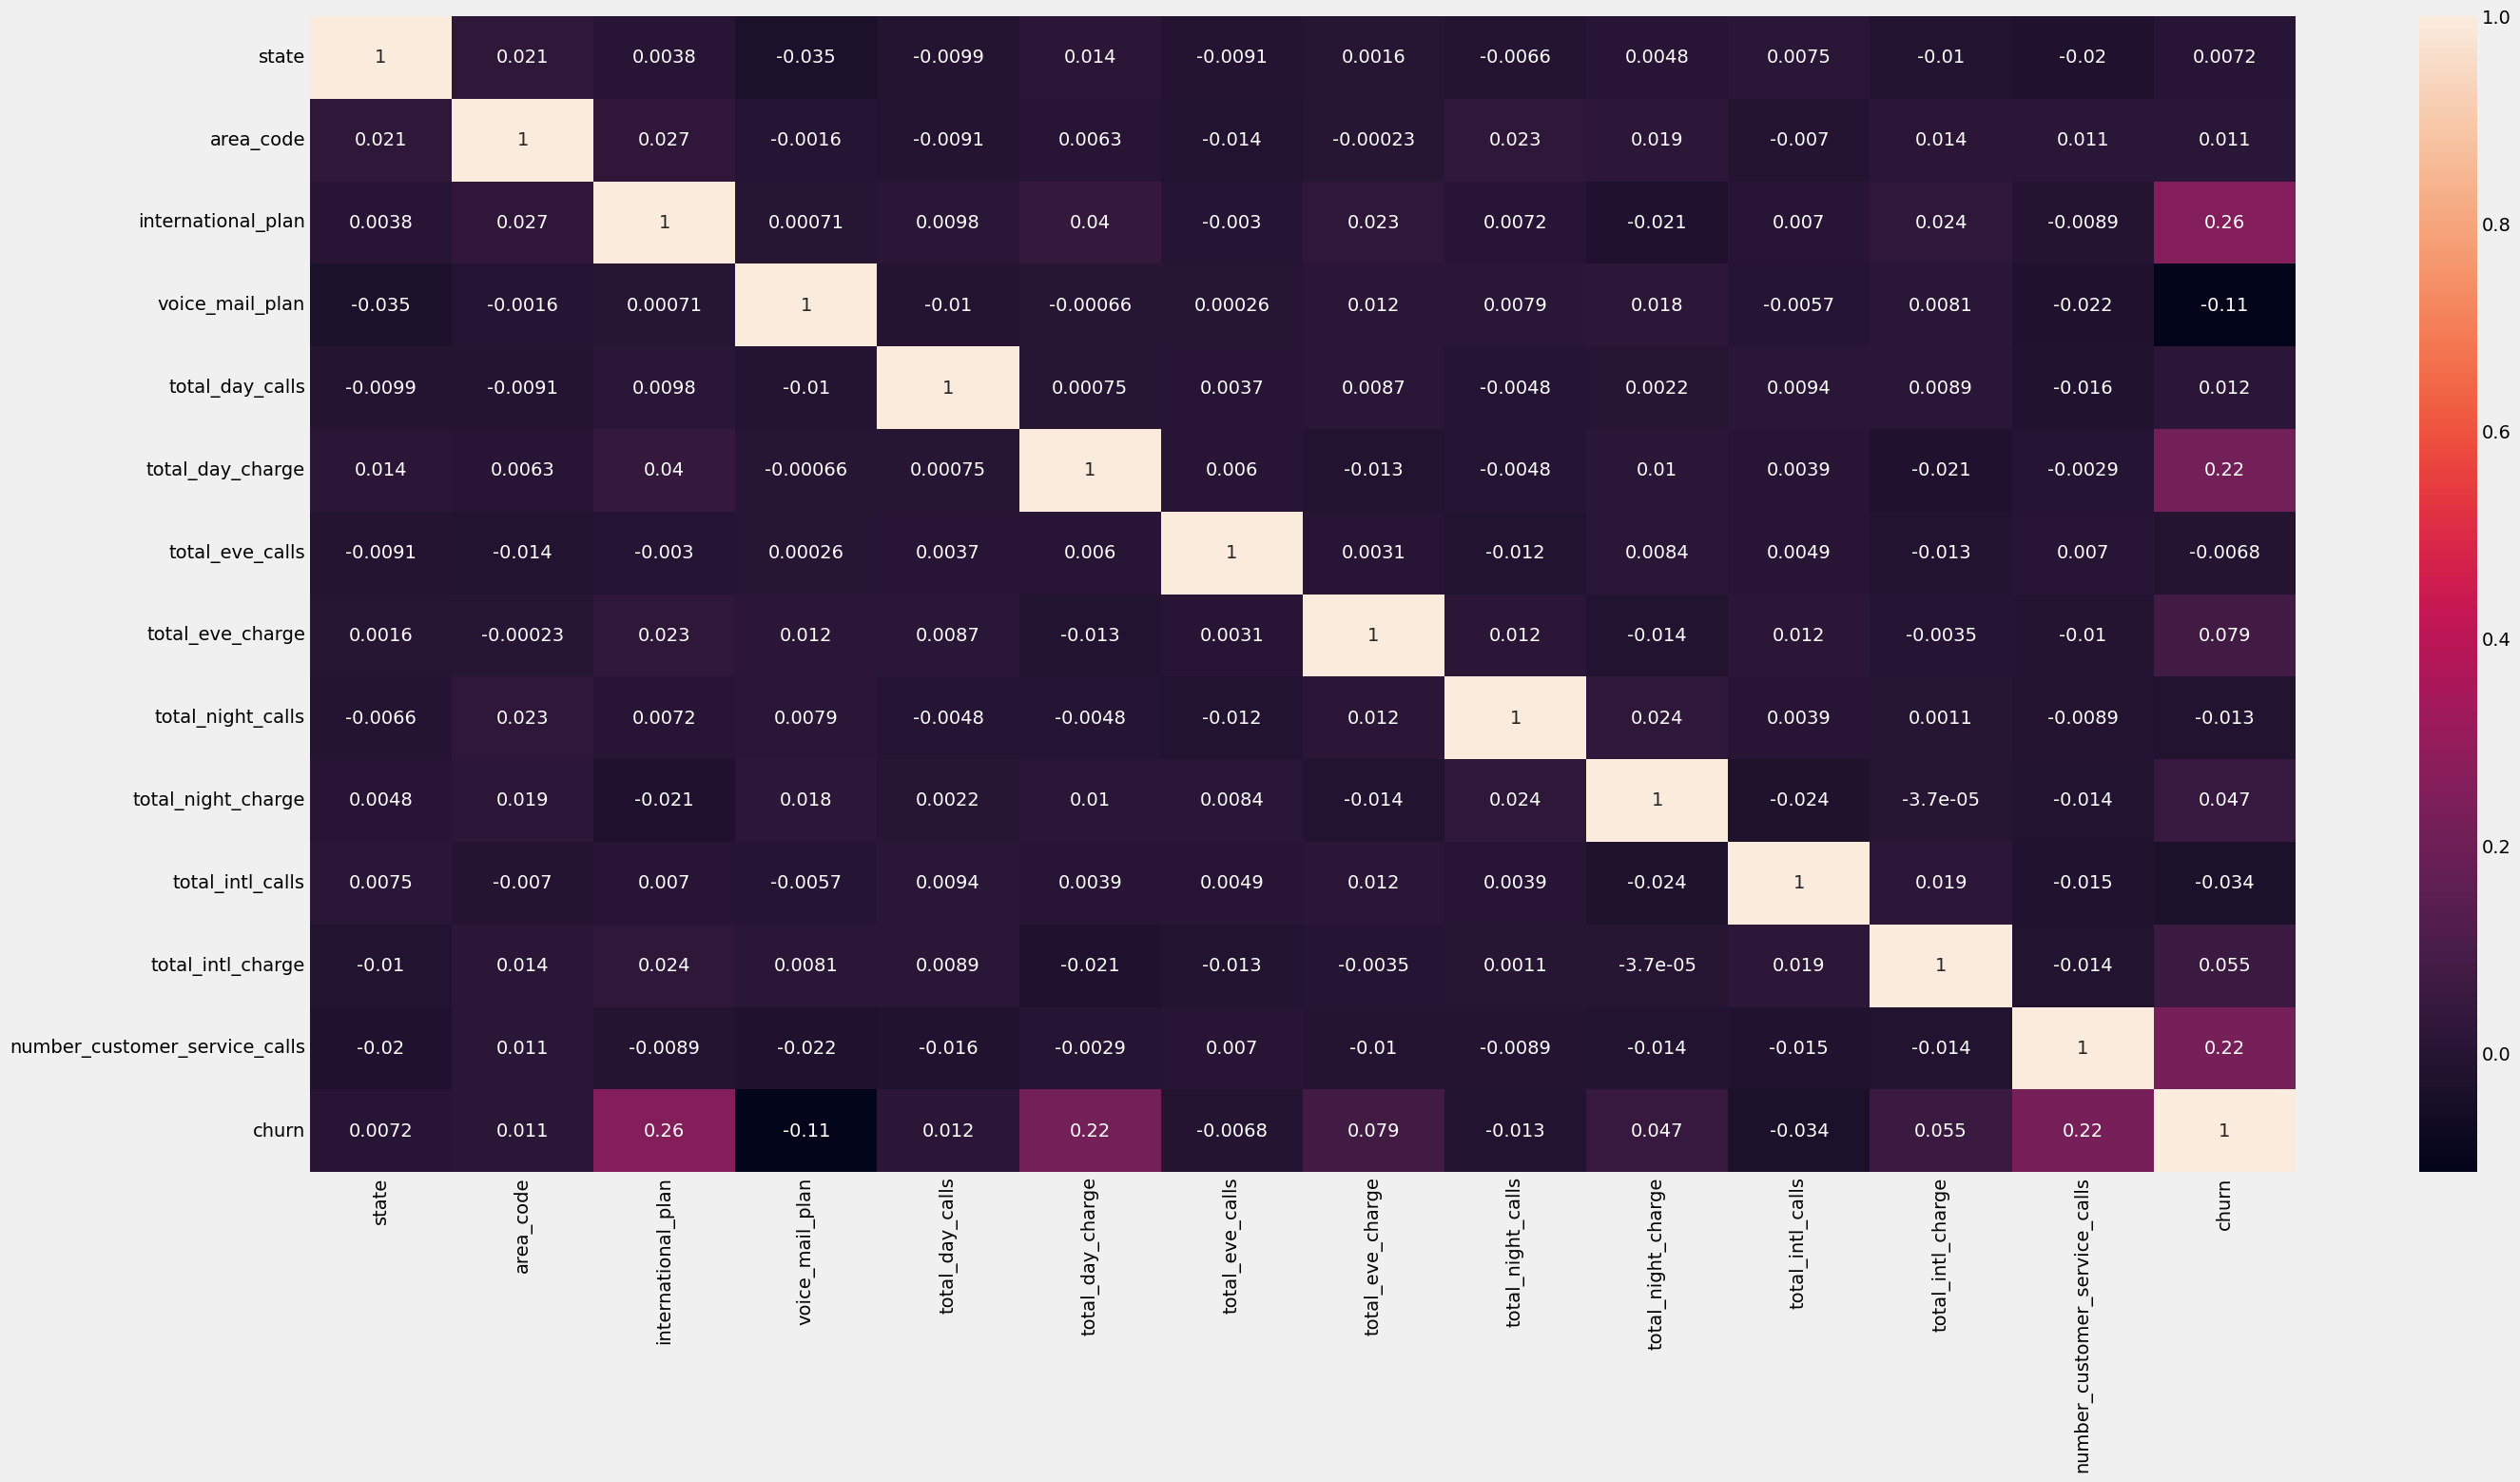

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,15))
#generate a correlation matrix for the whole dataset
corrMatrix = df_train.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
df_train['total_charge'] = df_train['total_day_charge'] + df_train['total_eve_charge'] + df_train['total_night_charge'] + df_train['total_intl_charge']
df_test['total_charge'] = df_test['total_day_charge'] + df_test['total_eve_charge'] + df_test['total_night_charge'] + df_test['total_intl_charge']
df_train['total_calls'] = df_train['total_day_calls'] + df_train['total_eve_calls'] + df_train['total_night_calls'] + df_train['total_intl_calls']
df_test['total_calls'] = df_test['total_day_calls'] + df_test['total_eve_calls'] + df_test['total_night_calls'] + df_test['total_intl_calls']
df_train = df_train.drop(['state', 'area_code','total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge', 'total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_intl_calls'], axis = 1)
df_test = df_test.drop(['state', 'area_code','total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge', 'total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_intl_calls'], axis = 1)

In [ ]:
df_train = df_train.drop(['state', 'area_code'], axis = 1)
df_test = df_test.drop(['state', 'area_code'], axis = 1)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   international_plan             4250 non-null   int64  
 1   voice_mail_plan                4250 non-null   int64  
 2   number_customer_service_calls  4250 non-null   int64  
 3   churn                          4250 non-null   int64  
 4   total_charge                   4250 non-null   float64
 5   total_calls                    4250 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 199.3 KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   international_plan             750 non-null    int64  
 1   voice_mail_plan                750 non-null    int64  
 2   number_customer_service_calls  750 non-null    int64  
 3   total_charge                   750 non-null    float64
 4   total_calls                    750 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 29.4 KB


In [ ]:
df_train.head()

,international_plan,voice_mail_plan,number_customer_service_calls,churn,total_charge,total_calls
0,0,1,1,0,59.24,332
1,0,0,0,0,62.29,333
2,1,0,2,0,66.80,255
3,1,0,3,0,52.09,359
4,0,1,3,0,78.31,321


##Check Missing Value

In [ ]:
from scipy import stats
import numpy as np

In [ ]:
df_train.isna().sum()

international_plan               0
voice_mail_plan                  0
number_customer_service_calls    0
churn                            0
total_charge                     0
total_calls                      0
dtype: int64

In [ ]:
df_train.describe()

,international_plan,voice_mail_plan,number_customer_service_calls,churn,total_charge,total_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,0.093176,0.261647,1.559059,0.140706,59.453240,304.349647
std,0.290714,0.439583,1.311434,0.347759,10.345845,34.519048
min,0.000000,0.000000,0.000000,0.000000,22.930000,191.000000
25%,0.000000,0.000000,1.000000,0.000000,52.432500,281.000000
50%,0.000000,0.000000,1.000000,0.000000,59.495000,305.000000
75%,0.000000,1.000000,2.000000,0.000000,66.300000,327.000000
max,1.000000,1.000000,9.000000,1.000000,96.150000,416.000000


##Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
x_train = df_train[['international_plan', 'voice_mail_plan', 'number_customer_service_calls', 'total_charge', 'total_calls']]
y_train = df_train['churn']

In [ ]:
scaler = MinMaxScaler()
x_train_transform = scaler.fit_transform(x_train)

In [ ]:
x_train_transform = pd.DataFrame(x_train_transform,columns = x_train.columns)

In [ ]:
x_train_transform.describe()

,international_plan,voice_mail_plan,number_customer_service_calls,total_charge,total_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,0.093176,0.261647,0.173229,0.498815,0.503776
std,0.290714,0.439583,0.145715,0.141298,0.153418
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.111111,0.402930,0.400000
50%,0.000000,0.000000,0.111111,0.499385,0.506667
75%,0.000000,1.000000,0.222222,0.592325,0.604444
max,1.000000,1.000000,1.000000,1.000000,1.000000


###Cadangan Norm

In [ ]:
df_train['number_vmail_messages'] = MinMaxScaler().fit_transform(df_train['number_vmail_messages'].values.reshape(len(df_train), 1))
df_train['total_day_minutes'] = MinMaxScaler().fit_transform(df_train['total_day_minutes'].values.reshape(len(df_train), 1))
df_train['total_day_calls'] = MinMaxScaler().fit_transform(df_train['total_day_calls'].values.reshape(len(df_train), 1))
df_train['total_day_charge'] = MinMaxScaler().fit_transform(df_train['total_day_charge'].values.reshape(len(df_train), 1))
df_train['total_eve_minutes'] = MinMaxScaler().fit_transform(df_train['total_eve_minutes'].values.reshape(len(df_train), 1))
df_train['total_eve_calls'] = MinMaxScaler().fit_transform(df_train['total_eve_calls'].values.reshape(len(df_train), 1))
df_train['total_eve_charge'] = MinMaxScaler().fit_transform(df_train['total_eve_charge'].values.reshape(len(df_train), 1))
df_train['total_night_minutes'] = MinMaxScaler().fit_transform(df_train['total_night_minutes'].values.reshape(len(df_train), 1))
df_train['total_night_calls'] = MinMaxScaler().fit_transform(df_train['total_night_calls'].values.reshape(len(df_train), 1))
df_train['total_night_charge'] = MinMaxScaler().fit_transform(df_train['total_night_charge'].values.reshape(len(df_train), 1))
df_train['total_intl_minutes'] = MinMaxScaler().fit_transform(df_train['total_intl_minutes'].values.reshape(len(df_train), 1))
df_train['total_intl_calls'] = MinMaxScaler().fit_transform(df_train['total_intl_calls'].values.reshape(len(df_train), 1))
df_train['total_intl_charge'] = MinMaxScaler().fit_transform(df_train['total_intl_charge'].values.reshape(len(df_train), 1))
df_train['number_customer_service_calls'] = MinMaxScaler().fit_transform(df_train['number_customer_service_calls'].values.reshape(len(df_train), 1))

In [ ]:
df_test['number_vmail_messages'] = MinMaxScaler().fit_transform(df_test['number_vmail_messages'].values.reshape(len(df_test), 1))
df_test['total_day_minutes'] = MinMaxScaler().fit_transform(df_test['total_day_minutes'].values.reshape(len(df_test), 1))
df_test['total_day_calls'] = MinMaxScaler().fit_transform(df_test['total_day_calls'].values.reshape(len(df_test), 1))
df_test['total_day_charge'] = MinMaxScaler().fit_transform(df_test['total_day_charge'].values.reshape(len(df_test), 1))
df_test['total_eve_minutes'] = MinMaxScaler().fit_transform(df_test['total_eve_minutes'].values.reshape(len(df_test), 1))
df_test['total_eve_calls'] = MinMaxScaler().fit_transform(df_test['total_eve_calls'].values.reshape(len(df_test), 1))
df_test['total_eve_charge'] = MinMaxScaler().fit_transform(df_test['total_eve_charge'].values.reshape(len(df_test), 1))
df_test['total_night_minutes'] = MinMaxScaler().fit_transform(df_test['total_night_minutes'].values.reshape(len(df_test), 1))
df_test['total_night_calls'] = MinMaxScaler().fit_transform(df_test['total_night_calls'].values.reshape(len(df_test), 1))
df_test['total_night_charge'] = MinMaxScaler().fit_transform(df_test['total_night_charge'].values.reshape(len(df_test), 1))
df_test['total_intl_minutes'] = MinMaxScaler().fit_transform(df_test['total_intl_minutes'].values.reshape(len(df_test), 1))
df_test['total_intl_calls'] = MinMaxScaler().fit_transform(df_test['total_intl_calls'].values.reshape(len(df_test), 1))
df_test['total_intl_charge'] = MinMaxScaler().fit_transform(df_test['total_intl_charge'].values.reshape(len(df_test), 1))
df_test['number_customer_service_calls'] = MinMaxScaler().fit_transform(df_test['number_customer_service_calls'].values.reshape(len(df_test), 1))

In [ ]:
df_train.describe()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000
mean,26.063727,0.485548,0.996302,0.091038,0.248933,0.173492,0.500451,0.498252,0.500392,0.502862,0.495577,0.502665,0.500976,0.503655,0.500736,0.504230,0.361941,0.505039,0.434519,0.104694
std,14.719921,0.192759,0.709508,0.287705,0.432457,0.313365,0.180942,0.185530,0.180952,0.180763,0.181668,0.180761,0.182787,0.181292,0.182804,0.184459,0.230510,0.184594,0.325224,0.306203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,0.354680,0.000000,0.000000,0.000000,0.000000,0.375043,0.375000,0.374924,0.378833,0.373832,0.378748,0.375658,0.383178,0.375418,0.381295,0.222222,0.381333,0.333333,0.000000
50%,26.000000,0.482759,1.000000,0.000000,0.000000,0.000000,0.500859,0.500000,0.500708,0.504618,0.495327,0.504563,0.501505,0.504673,0.501672,0.510791,0.333333,0.512000,0.333333,0.000000
75%,39.000000,0.620690,1.000000,0.000000,0.000000,0.000000,0.623926,0.625000,0.623862,0.625785,0.616822,0.625380,0.629421,0.626168,0.629599,0.625899,0.444444,0.626667,0.666667,0.000000
max,50.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_test.describe()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,25.456000,0.419347,1.022667,0.102667,0.281333,0.165778,0.496467,0.497753,0.496399,0.517468,0.498215,0.517590,0.474536,0.566479,0.474669,0.544663,0.236070,0.545085,0.272444
std,14.995507,0.167506,0.695796,0.303726,0.449950,0.276936,0.157429,0.159020,0.157429,0.156949,0.152500,0.156958,0.164427,0.122982,0.164462,0.146579,0.127468,0.146609,0.212701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,0.308017,1.000000,0.000000,0.000000,0.000000,0.396468,0.395161,0.396366,0.407820,0.393701,0.407909,0.362396,0.487179,0.362589,0.451058,0.157895,0.451961,0.166667
50%,26.000000,0.421941,1.000000,0.000000,0.000000,0.000000,0.489802,0.500000,0.489741,0.517744,0.503937,0.517870,0.473995,0.567308,0.474113,0.544974,0.210526,0.545098,0.166667
75%,38.000000,0.527426,2.000000,0.000000,1.000000,0.411765,0.601463,0.604839,0.601374,0.615865,0.598425,0.615977,0.586790,0.647436,0.586879,0.640212,0.315789,0.641176,0.333333
max,50.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3515 entries, 0 to 4248
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3515 non-null   int64  
 1   account_length                 3515 non-null   float64
 2   area_code                      3515 non-null   int64  
 3   international_plan             3515 non-null   int64  
 4   voice_mail_plan                3515 non-null   int64  
 5   number_vmail_messages          3515 non-null   float64
 6   total_day_minutes              3515 non-null   float64
 7   total_day_calls                3515 non-null   float64
 8   total_day_charge               3515 non-null   float64
 9   total_eve_minutes              3515 non-null   float64
 10  total_eve_calls                3515 non-null   float64
 11  total_eve_charge               3515 non-null   float64
 12  total_night_minutes            3515 non-null   f

#Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

In [ ]:
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(x_train_transform, y_train, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train.shape[0], X_val.shape[0])

3400 850


In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

##Evaluation

In [ ]:
Y_val_pred = model.predict(X_val)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(Y_val, Y_val_pred)
precision = precision_score(Y_val, Y_val_pred)
recall = recall_score(Y_val, Y_val_pred)
f1 = f1_score(Y_val, Y_val_pred)
print('Accuracy:    {0:0.3f}%'.format(accuracy*100))
print('Precision:   {0:0.3f}%'.format(precision*100))
print('Recall:      {0:0.3f}%'.format(recall*100))
print('F1-Score:    {0:0.3f}%'.format(f1*100))

Accuracy:    87.529%
Precision:   68.000%
Recall:      14.783%
F1-Score:    24.286%


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_val, Y_val_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       735
           1       0.68      0.15      0.24       115

    accuracy                           0.88       850
   macro avg       0.78      0.57      0.59       850
weighted avg       0.85      0.88      0.84       850



##Full Dataset (Logistic Regression Model)

In [ ]:
model.fit(x_train_transform, y_train)

LogisticRegression()

In [ ]:
x_test = df_test[['international_plan', 'voice_mail_plan', 'number_customer_service_calls', 'total_charge', 'total_calls']]
scaler = MinMaxScaler()
x_test_transform = scaler.fit_transform(x_test)
x_test_transform = pd.DataFrame(x_test_transform,columns = x_test.columns)

In [ ]:
y_test_pred = model.predict(x_test_transform)

In [ ]:
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
np.unique(y_test_pred, return_counts = True)

(array([0, 1]), array([677,  73]))

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
x_train_transform2 = x_train_transform.copy()
x_test_transform2 = x_test_transform.copy()
y_train = df_train['churn']

In [ ]:
X_train2, X_val2, Y_train2, Y_val2 = model_selection.train_test_split(x_train_transform2, y_train, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train.shape[0], X_val.shape[0])

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train2, Y_train2)

KNeighborsClassifier(n_neighbors=3)

##Predictions

In [ ]:
Y_val_pred2 = knn.predict(X_val2)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(Y_val2, Y_val_pred2)
precision = precision_score(Y_val2, Y_val_pred2)
recall = recall_score(Y_val2, Y_val_pred2)
f1 = f1_score(Y_val2, Y_val_pred2)
print('Accuracy:    {0:0.3f}%'.format(accuracy*100))
print('Precision:   {0:0.3f}%'.format(precision*100))
print('Recall:      {0:0.3f}%'.format(recall*100))
print('F1-Score:    {0:0.3f}%'.format(f1*100))

Accuracy:    93.765%
Precision:   84.444%
Recall:      66.087%
F1-Score:    74.146%


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_val2, Y_val_pred2))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       735
           1       0.84      0.66      0.74       115

    accuracy                           0.94       850
   macro avg       0.90      0.82      0.85       850
weighted avg       0.93      0.94      0.93       850



##Full Dataset (kNN Model)

In [ ]:
knn.fit(x_train_transform2, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_test_pred2 = knn.predict(x_test_transform2)

In [ ]:
np.unique(y_test_pred2, return_counts = True)

(array([0, 1]), array([600, 150]))

In [ ]:
print(y_test_pred2)

[0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
x_train_transform3 = x_train_transform.copy()
x_test_transform3 = x_test_transform.copy()

In [ ]:
X_train3, X_val3, Y_train3, Y_val3 = model_selection.train_test_split(x_train_transform3, y_train, test_size = 0.2, random_state = 0)

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train3, Y_train3)

DecisionTreeClassifier()

##Prediction

In [ ]:
Y_val_pred3 = dtc.predict(X_val3)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(Y_val3, Y_val_pred3)
precision = precision_score(Y_val3, Y_val_pred3)
recall = recall_score(Y_val3, Y_val_pred3)
f1 = f1_score(Y_val3, Y_val_pred3)
print('Accuracy:    {0:0.3f}%'.format(accuracy*100))
print('Precision:   {0:0.3f}%'.format(precision*100))
print('Recall:      {0:0.3f}%'.format(recall*100))
print('F1-Score:    {0:0.3f}%'.format(f1*100))

Accuracy:    93.765%
Precision:   79.245%
Recall:      73.043%
F1-Score:    76.018%


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_val3, Y_val_pred3))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       735
           1       0.79      0.73      0.76       115

    accuracy                           0.94       850
   macro avg       0.88      0.85      0.86       850
weighted avg       0.94      0.94      0.94       850



##Full Dataset (Decision Tree)

In [ ]:
dtc.fit(x_train_transform3, y_train)

DecisionTreeClassifier()

In [ ]:
y_test_pred3 = dtc.predict(x_test_transform3)

In [ ]:
print(y_test_pred3)

[0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 0 1 

In [ ]:
np.unique(y_test_pred3, return_counts = True)

(array([0, 1]), array([583, 167]))

##Full Dataset (Decision Tree)

In [ ]:
dtc.fit(x_train_transform3, y_train)

DecisionTreeClassifier()

In [ ]:
y_test_pred3 = dtc.predict(x_test_transform3)

In [ ]:
print(y_test_pred3)

[0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 0 1 

In [ ]:
np.unique(y_test_pred3, return_counts = True)

(array([0, 1]), array([583, 167]))

#Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
x_train_transform4 = x_train_transform.copy()
x_test_transform4 = x_test_transform.copy()

In [ ]:
X_train4, X_val4, Y_train4, Y_val4 = model_selection.train_test_split(x_train_transform4, y_train, test_size = 0.2, random_state = 0)

In [ ]:
nbc = GaussianNB()
nbc.fit(X_train4, Y_train4)

GaussianNB()

##Prediction

In [ ]:
Y_val_pred4 = nbc.predict(X_val4)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(Y_val4, Y_val_pred4)
precision = precision_score(Y_val4, Y_val_pred4)
recall = recall_score(Y_val4, Y_val_pred4)
f1 = f1_score(Y_val4, Y_val_pred4)
print('Accuracy:    {0:0.3f}%'.format(accuracy*100))
print('Precision:   {0:0.3f}%'.format(precision*100))
print('Recall:      {0:0.3f}%'.format(recall*100))
print('F1-Score:    {0:0.3f}%'.format(f1*100))

Accuracy:    86.706%
Precision:   51.087%
Recall:      40.870%
F1-Score:    45.411%


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_val4, Y_val_pred4))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       735
           1       0.51      0.41      0.45       115

    accuracy                           0.87       850
   macro avg       0.71      0.67      0.69       850
weighted avg       0.86      0.87      0.86       850



##Full Dataset (Naive Bayes)

In [ ]:
nbc.fit(x_train_transform4, y_train)

GaussianNB()

In [ ]:
y_test_pred4 = nbc.predict(x_test_transform4)

In [ ]:
print(y_test_pred4)

[0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0
 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0
 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 1 0 0 1 1 0 0 1 

In [ ]:
np.unique(y_test_pred4, return_counts = True)

(array([0, 1]), array([584, 166]))

#Random Forest

In [ ]:
x_train_transform5 = x_train_transform.copy()
x_test_transform5 = x_test_transform.copy()

In [ ]:
X_train5, X_val5, Y_train5, Y_val5 = model_selection.train_test_split(x_train_transform5, y_train, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train5, Y_train5)

RandomForestClassifier()

##Prediction

In [ ]:
Y_val_pred5 = rfc.predict(X_val5)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(Y_val5, Y_val_pred5)
precision = precision_score(Y_val5, Y_val_pred5)
recall = recall_score(Y_val5, Y_val_pred5)
f1 = f1_score(Y_val5, Y_val_pred5)
print('Accuracy:    {0:0.3f}%'.format(accuracy*100))
print('Precision:   {0:0.3f}%'.format(precision*100))
print('Recall:      {0:0.3f}%'.format(recall*100))
print('F1-Score:    {0:0.3f}%'.format(f1*100))

Accuracy:    95.176%
Precision:   92.045%
Recall:      70.435%
F1-Score:    79.803%


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_val5, Y_val_pred5))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       735
           1       0.92      0.70      0.80       115

    accuracy                           0.95       850
   macro avg       0.94      0.85      0.89       850
weighted avg       0.95      0.95      0.95       850



##Full Dataset (Random Forest)

In [ ]:
rfc.fit(x_train_transform5, y_train)

RandomForestClassifier()

In [ ]:
y_test_pred5 = rfc.predict(x_test_transform5)

In [ ]:
np.unique(y_test_pred5, return_counts = True)

(array([0, 1]), array([613, 137]))

In [ ]:
print(y_test_pred5)

[0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 0 1 

#Insert into Dataframe

In [ ]:
df_test['churn-logreg'] = y_test_pred
df_test['churn-knn'] = y_test_pred2
df_test

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn-logreg,churn-knn
0,16,0.535865,1,0,1,0.490196,0.746675,0.572581,0.746653,0.499850,...,0.500000,0.618379,0.506410,0.618440,0.529101,0.157895,0.529412,0.166667,0,0
1,1,0.493671,2,1,0,0.000000,0.623411,0.475806,0.623370,0.569624,...,0.569710,0.488194,0.679487,0.488652,0.333333,0.315789,0.333333,0.000000,1,0
2,12,0.257384,1,0,0,0.000000,0.319834,0.250000,0.319770,0.830075,...,0.830149,0.485322,0.557692,0.485816,0.693122,0.315789,0.694118,0.666667,0,0
3,46,0.388186,2,0,0,0.000000,0.526751,0.604839,0.526691,0.562406,...,0.562633,0.251117,0.698718,0.251064,0.428571,0.157895,0.429412,0.500000,0,0
4,29,0.729958,1,0,0,0.000000,0.330476,0.298387,0.330377,0.739549,...,0.739561,0.637524,0.660256,0.637589,0.820106,0.263158,0.821569,0.500000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,10,0.544304,1,0,0,0.000000,0.315992,0.483871,0.315945,0.586767,...,0.587049,0.484365,0.634615,0.484397,0.597884,0.368421,0.598039,0.000000,0,0
746,47,0.303797,0,0,0,0.000000,0.486846,0.637097,0.486698,0.719699,...,0.719745,0.609126,0.641026,0.609220,0.650794,0.105263,0.650980,0.500000,0,0
747,49,0.637131,1,0,0,0.000000,0.507538,0.411290,0.507390,0.678496,...,0.678698,0.519145,0.647436,0.519149,0.777778,0.105263,0.778431,0.500000,0,0
748,7,0.253165,1,0,0,0.000000,0.378658,0.403226,0.378543,0.425865,...,0.426044,0.515316,0.544872,0.515603,0.719577,0.210526,0.719608,0.166667,0,0
